In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime

Import the data into a pandas dataframe and look at the column names

In [2]:
train_df = pd.read_csv('data.csv')
train_df.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

List the variable data types

In [3]:
train_df.dtypes

action_type            object
combined_shot_type     object
game_event_id           int64
game_id                 int64
lat                   float64
loc_x                   int64
loc_y                   int64
lon                   float64
minutes_remaining       int64
period                  int64
playoffs                int64
season                 object
seconds_remaining       int64
shot_distance           int64
shot_made_flag        float64
shot_type              object
shot_zone_area         object
shot_zone_basic        object
shot_zone_range        object
team_id                 int64
team_name              object
game_date              object
matchup                object
opponent               object
shot_id                 int64
dtype: object

Preview the first 5 rows

In [4]:
train_df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


We can see that there are some redundant features. Kobe has only played for Los Angelas Lakers, so this feature is not relevant for the analysis.

In [5]:
train_df['team_name'].unique()

array(['Los Angeles Lakers'], dtype=object)

In [6]:
train_df['team_id'].unique()

array([1610612747], dtype=int64)

We can drop team_name and team_id. The 'matchup' feature is also not needed since we know it involves LAL and the team labelled in 'opponent'. The season feature can be dropped since the year is already represented in the date. I will split the data into year, month, day

In [7]:
train_df = train_df.drop(['team_name','team_id','matchup','season'], axis=1)

In [8]:
train_df['game_date'] = pd.to_datetime(train_df['game_date'])
train_df['year'] = train_df['game_date'].dt.year
train_df['month'] = train_df['game_date'].dt.month
train_df['day'] = train_df['game_date'].dt.day
train_df['dayofweek'] = train_df['game_date'].dt.weekday

We can see see that the data is not ordered by data. I will order it primarily by the game date, and then the game_event_id

In [9]:
train_df['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 1996, 1997, 1998, 1999],
      dtype=int64)

In [10]:
train_df = train_df.sort_values(['game_date','game_event_id'])
train_df = train_df.drop('game_date',axis=1)

In [11]:
train_df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,shot_id,year,month,day,dayofweek
22901,Jump Shot,Jump Shot,102,29600027,33.9283,-140,116,-118.4098,0,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,MIN,22902,1996,11,3,6
22902,Jump Shot,Jump Shot,127,29600031,33.9473,-131,97,-118.4008,10,2,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,NYK,22903,1996,11,5,1
22903,Jump Shot,Jump Shot,124,29600044,33.8633,-142,181,-118.4118,8,2,...,3PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,CHA,22904,1996,11,6,2
22904,Jump Shot,Jump Shot,144,29600044,34.0443,0,0,-118.2698,6,2,...,3PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,CHA,22905,1996,11,6,2
22905,Jump Shot,Jump Shot,151,29600044,33.9063,-10,138,-118.2798,5,2,...,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,CHA,22906,1996,11,6,2


I'm going to combine minutes_remaining (0-12min) and seconds_remaining (0-60s) in a single column of floating point numbers, and then drop the original columns.

In [12]:
train_df['period_minutes_remaining'] = train_df['minutes_remaining']+train_df['seconds_remaining']/60
train_df = train_df.drop(['minutes_remaining','seconds_remaining'],axis=1)

We can take a look at the correlation heatmap to see what other features are correlated.

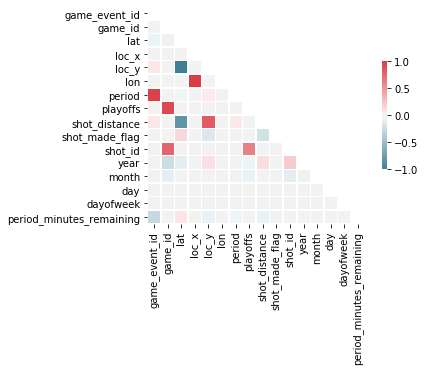

In [13]:
# compute the correlation
corr = train_df.corr()

# set a mask since the correlation matrix is symmetrical along the diagonal
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
                             
sns.heatmap(corr, mask=mask,cmap=cmap, vmax=1,vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The latitude and logitude are redudant with loc_y and loc_x, so these can be dropped.

In [14]:
train_df = train_df.drop(['lon','lat'], axis=1)
train_df.head()

,action_type,combined_shot_type,game_event_id,game_id,loc_x,loc_y,period,playoffs,shot_distance,shot_made_flag,...,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,shot_id,year,month,day,dayofweek,period_minutes_remaining
22901,Jump Shot,Jump Shot,102,29600027,-140,116,1,0,18,0.0,...,Left Side Center(LC),Mid-Range,16-24 ft.,MIN,22902,1996,11,3,6,0.700000
22902,Jump Shot,Jump Shot,127,29600031,-131,97,2,0,16,0.0,...,Left Side Center(LC),Mid-Range,16-24 ft.,NYK,22903,1996,11,5,1,10.133333
22903,Jump Shot,Jump Shot,124,29600044,-142,181,2,0,23,1.0,...,Left Side Center(LC),Mid-Range,16-24 ft.,CHA,22904,1996,11,6,2,8.616667
22904,Jump Shot,Jump Shot,144,29600044,0,0,2,0,0,0.0,...,Center(C),Restricted Area,Less Than 8 ft.,CHA,22905,1996,11,6,2,6.566667
22905,Jump Shot,Jump Shot,151,29600044,-10,138,2,0,13,1.0,...,Center(C),In The Paint (Non-RA),8-16 ft.,CHA,22906,1996,11,6,2,5.450000


Let's take a look at the total types of shots Kobe made. Note that this is on a log scale.

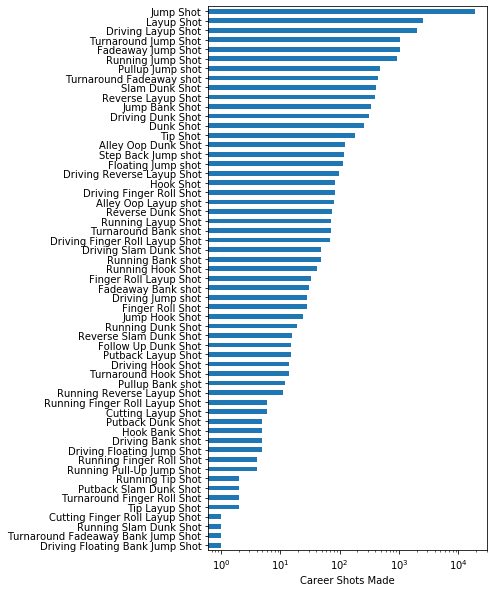

In [15]:
ax = train_df['action_type'].value_counts(ascending=True).plot.barh(logx=True,figsize=(5,10))
ax.set_xlabel('Career Shots Made');

In [16]:
shot_type_df = train_df[['action_type','shot_made_flag','shot_id']].groupby(['action_type','shot_made_flag']).count().unstack()
shot_type_df.columns

MultiIndex([('shot_id', 0.0),
            ('shot_id', 1.0)],
           names=[None, 'shot_made_flag'])

The missed and made shots can be separated

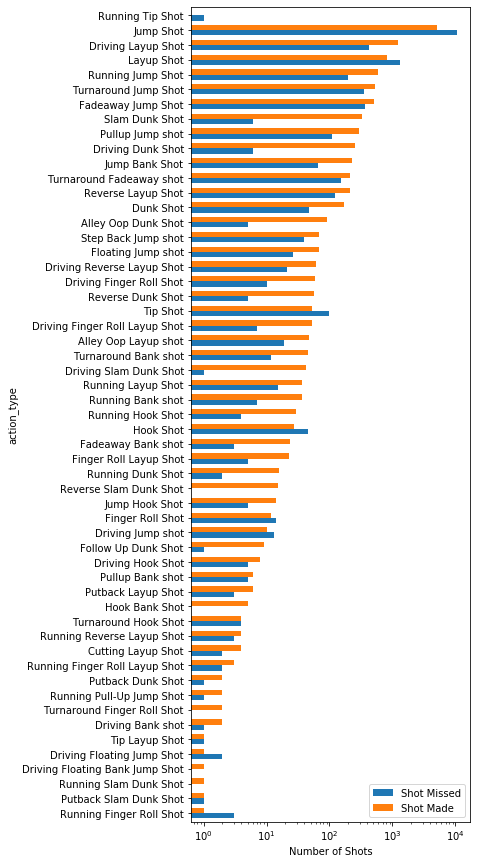

In [17]:
ax = shot_type_df.sort_values(by=('shot_id', 1.0)).plot.barh(logx=True,figsize=(5,15),width=0.7)
ax.legend(['Shot Missed','Shot Made'])
ax.set_xlabel('Number of Shots');

and the success rate for each type of shot is shown below. Even though the jump shot is the most frequently used shot, it doesn't have a high success rate. The slam dunk has the highest success rate since it's so close to the net.

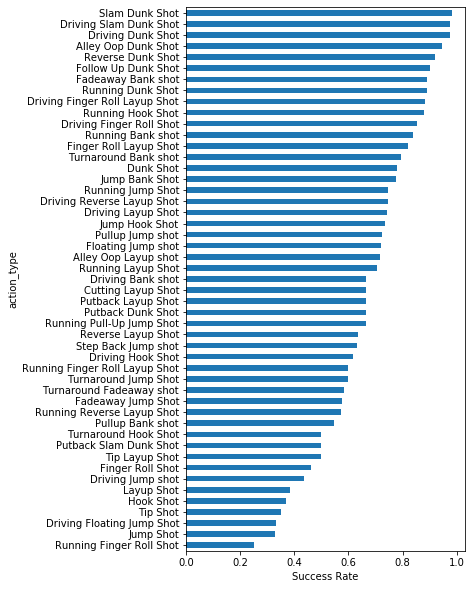

In [18]:
shot_type_df['Shot Success Rate'] = shot_type_df[('shot_id', 1.0)]/(shot_type_df[('shot_id', 1.0)]+shot_type_df[('shot_id', 0.0)])
ax = shot_type_df['Shot Success Rate'].sort_values().dropna().plot.barh(logx=False,figsize=(5,10))
ax.set_xlabel('Success Rate');

I'm interested in seeing the average number of shots Kobe takes during each quarter. The average number of shots is an indication of how often Kobe is on the court.

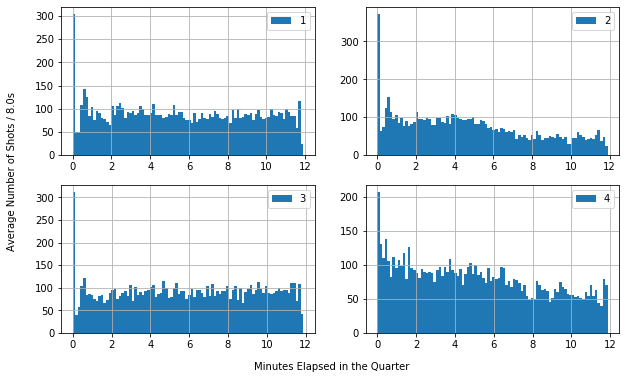

In [19]:
figure, axes = plt.subplots(2, 2,figsize=(10,6))
binsize=90
train_df[train_df['period']==1]['period_minutes_remaining'].hist(bins=binsize, ax=axes[0,0])
train_df[train_df['period']==2]['period_minutes_remaining'].hist(bins=binsize, ax=axes[0,1])
train_df[train_df['period']==3]['period_minutes_remaining'].hist(bins=binsize, ax=axes[1,0])
train_df[train_df['period']==4]['period_minutes_remaining'].hist(bins=binsize, ax=axes[1,1])
figure.text(0.5, 0.04, 'Minutes Elapsed in the Quarter', ha='center')
figure.text(0.05, 0.5, 'Average Number of Shots / '+str(np.round(12/binsize*60,1))+'s', va='center', rotation='vertical')
axes[0,0].legend('1st')
axes[0,1].legend('2nd')
axes[1,0].legend('3rd')
axes[1,1].legend('4th')

We can see that in the second quarter after about 6 minutes, he typically takes a rest. In the 4th quarter, he typically plays more minutes. What's also interesting is the spike in the last minutes of the 4th quarter, indicating that Kobe usually takes the last shot to try to win the game.

[(0, 600), (-300, 300), None]

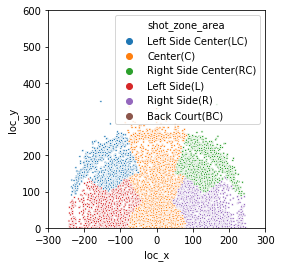

In [20]:
ax = sns.scatterplot('loc_x','loc_y',data=train_df[train_df['shot_made_flag']==1], s=5, hue='shot_zone_area')
ax.set(xlim=(-300,300),ylim=(0, 600),aspect=1)

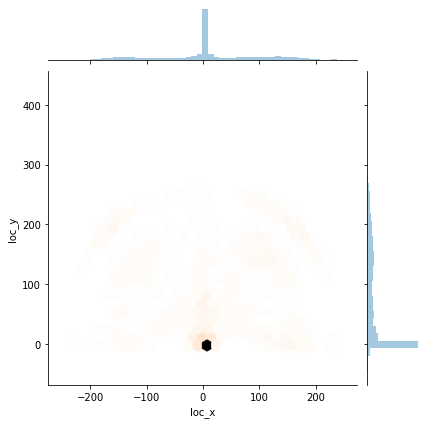

In [21]:
from matplotlib.axes import Axes
sns.jointplot('loc_x','loc_y',data=train_df[train_df['shot_made_flag']==1],kind='hex',joint_kws = dict(gridsize=30),cmap=plt.cm.gist_heat_r)

Split the data into a training and test set.

In [66]:
X_test = train_df[train_df['shot_made_flag'].isnull()].drop('shot_made_flag',axis=1)
X_train_full = train_df[train_df['shot_made_flag'].notnull()]
y_train_full = X_train_full.pop('shot_made_flag')

In [34]:
X_test.head()

,action_type,combined_shot_type,game_event_id,game_id,loc_x,loc_y,period,playoffs,shot_distance,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,shot_id,year,month,day,dayofweek,period_minutes_remaining
22906,Jump Shot,Jump Shot,157,29600057,75,177,2,0,19,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,TOR,22907,1996,11,8,4,7.300000
22908,Layup Shot,Layup,321,29600057,0,0,3,0,0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,TOR,22909,1996,11,8,4,3.416667
22925,Jump Shot,Jump Shot,151,29600126,179,164,2,0,24,3PT Field Goal,Right Side Center(RC),Above the Break 3,24+ ft.,PHX,22926,1996,11,17,6,7.000000
22926,Jump Shot,Jump Shot,156,29600126,-226,30,2,0,22,3PT Field Goal,Left Side(L),Left Corner 3,24+ ft.,PHX,22927,1996,11,17,6,6.183333
22929,Jump Shot,Jump Shot,193,29600126,-27,223,2,0,22,3PT Field Goal,Center(C),Mid-Range,16-24 ft.,PHX,22930,1996,11,17,6,1.633333


In [35]:
X_train_full.head()

,action_type,combined_shot_type,game_event_id,game_id,loc_x,loc_y,period,playoffs,shot_distance,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,shot_id,year,month,day,dayofweek,period_minutes_remaining
22901,Jump Shot,Jump Shot,102,29600027,-140,116,1,0,18,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,MIN,22902,1996,11,3,6,0.700000
22902,Jump Shot,Jump Shot,127,29600031,-131,97,2,0,16,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,NYK,22903,1996,11,5,1,10.133333
22903,Jump Shot,Jump Shot,124,29600044,-142,181,2,0,23,3PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,CHA,22904,1996,11,6,2,8.616667
22904,Jump Shot,Jump Shot,144,29600044,0,0,2,0,0,3PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,CHA,22905,1996,11,6,2,6.566667
22905,Jump Shot,Jump Shot,151,29600044,-10,138,2,0,13,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,CHA,22906,1996,11,6,2,5.450000


### Build pipeline

In [44]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

In [74]:
cat_attribs = train_df.select_dtypes(include=object).columns.tolist()
num_attribs = train_df.select_dtypes(exclude=object).drop('shot_made_flag', axis=1).columns.tolist()

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")) # even though there are no missing values
])

full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", encoder, cat_attribs),
])

In [79]:
X_train_transformed = full_pipeline.fit_transform(X_train_full)
X_test_transformed = full_pipeline.fit_transform(X_test)

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train_transformed, y_train_full, test_size=0.2, random_state=42)

A plot of the successful shot locations. It can be clearly seen where the 3pt line is.

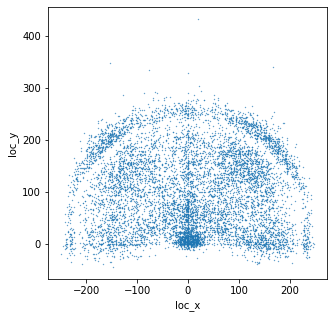

In [83]:
X_train_full[y_train_full==1].plot.scatter('loc_x','loc_y',figsize=(5,5), s=0.1)

In 2015-2016, Kobe clearly transitioned to shooting from the 3pt range than 2pt.

In [158]:
yearly_shot_value = train_df[['action_type','shot_type','year']].groupby(by=['year','shot_type']).count().unstack()
yearly_shot_value.head()

action_type               
shot_type 2PT Field Goal 3PT Field Goal
year                                   
1996                  51             36
1997                 550            210
1998                 472            147
1999                1039            143
2000                1746            301

In [159]:
yearly_shot_value.columns

MultiIndex([('action_type', '2PT Field Goal'),
            ('action_type', '3PT Field Goal')],
           names=[None, 'shot_type'])

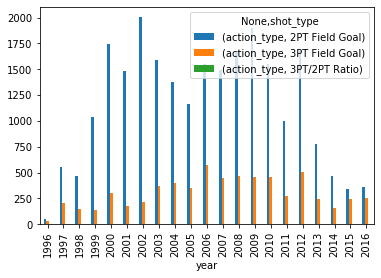

In [166]:
yearly_shot_value[('action_type','3PT/2PT Ratio')] = yearly_shot_value[('action_type', '3PT Field Goal')]/yearly_shot_value[('action_type', '2PT Field Goal')]
yearly_shot_value.plot.bar()

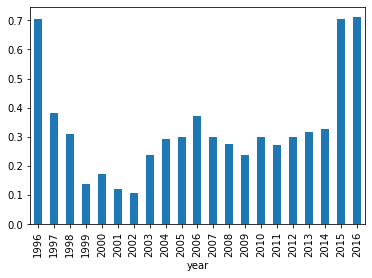

In [168]:
yearly_shot_value[ ('action_type','3PT/2PT Ratio')].plot.bar()

### Machine Learning Model: Random Forest Classifier
The model will be evaluated based on the log loss error

In [214]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
RFC = RandomForestClassifier(max_depth=10, max_features=15,n_estimators=30)
RFC.fit(X_train, y_train)
y_pred_valid = RFC.predict_proba(X_valid)[:,1]
print(log_loss(y_valid,y_pred_valid))
y_pred_testRF = RFC.predict_proba(X_test_transformed)[:,1]

0.603368261788146


In [215]:
RFC.feature_importances_

array([5.64845757e-02, 2.92281503e-02, 4.61518306e-02, 4.60888185e-02,
       6.24116985e-03, 7.32697636e-04, 5.09007897e-02, 4.55700633e-02,
       3.68579389e-02, 1.48924391e-02, 3.96537735e-02, 1.68004048e-02,
       6.88565174e-02, 4.38221211e-01, 5.37184951e-02, 3.62844564e-04,
       3.95077065e-03, 5.55683156e-03, 2.86456449e-03, 3.68661134e-02])

(array([  31.,   69.,  902., 2231.,  471.,  259.,  383.,  414.,  223.,
         157.]),
 array([0.00149051, 0.10130751, 0.20112451, 0.30094151, 0.40075851,
        0.50057551, 0.60039251, 0.70020951, 0.80002651, 0.8998435 ,
        0.9996605 ]),
 <a list of 10 Patch objects>)

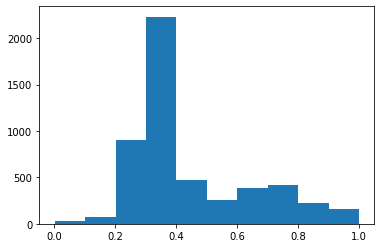

In [216]:
plt.hist(y_pred_valid)

In [217]:
submission_df = X_test

In [218]:
submission_df['shot_made_flag'] = y_pred_testRF.tolist()

In [219]:
submission_df[['shot_id','shot_made_flag']].sort_values(by='shot_id')

,shot_id,shot_made_flag
0,1,0.520784
7,8,0.614805
16,17,0.570434
19,20,0.647203
32,33,0.457390
...,...,...
30668,30669,0.626014
30680,30681,0.455674
30682,30683,0.532444
30686,30687,0.480641


In [220]:
submission_df[['shot_id','shot_made_flag']].to_csv('Submissions_Kobe_RF.csv',index=False)

## Extra
k-fold cross validation and gridsearch

In [123]:
from sklearn.model_selection import cross_val_score
RFC = RandomForestClassifier(max_features=10, n_estimators=200)
scores = cross_val_score(RFR, X_train_transformed, y_train_full,
scoring="accuracy", cv=5)
scores

array([0.59922179, 0.67062257, 0.64214828, 0.58513329, 0.57812804])

In [132]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [10,20,30], 'max_features':[5,10,15], 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]
RFC = RandomForestClassifier()
grid_search = GridSearchCV(RFC, param_grid, cv=3,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(X_train_transformed, y_train_full)
grid_search.best_params_

{'bootstrap': True, 'max_depth': 10, 'max_features': 15, 'n_estimators': 30}

In [133]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.5947779127598092 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 10}
0.6097987322956482 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 20}
0.6110050518535904 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 30}
0.6018213805631418 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 10}
0.6041948562623098 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 20}
0.6010820506746444 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 30}
0.6073863566923123 {'bootstrap': True, 'max_depth': 10, 'max_features': 15, 'n_estimators': 10}
0.6158695434785938 {'bootstrap': True, 'max_depth': 10, 'max_features': 15, 'n_estimators': 20}
0.6163755239186024 {'bootstrap': True, 'max_depth': 10, 'max_features': 15, 'n_estimators': 30}
0.5726360255183734 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 10}
0.5759433851467154 {'bootstrap': True, 'max_

In [120]:
RFC

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)